# Simple Linear Regression Project Lab

## Ice-Cream Sales Prediction

### Giovanni Paz-Siva

# Objectives

* Use scikit-learn to implement simple linear regression
* Create, train, test, and regulate a linear regression model on real data
* Describe each step with clarity to show good understanding on the material

# Import needed packages

* NumPy
* Matplotlib
* Pandas
* Scikit-learn

In [12]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print("Numpy Version",np.__version__)
print("Pandas Version:",pd.__version__)

Numpy Version 2.3.0
Pandas Version: 2.3.0


## Data Loaded

##### The data used in this lab is provided by Kaggle "Ice Cream.csv".
##### link: "https://www.kaggle.com/code/ddosad/ml-for-beginners-icecream-sales-prediction/input?select=Ice+Cream.csv"
##### The units for "Temperature" are in Celsius, and "Revenue" in USD.
##### The temperature is measured at a particular time in a year.
##### The revenue is from sales against the Temperature.
##### Please note: The Data/Time is not given in the data.

In [72]:
df = pd.read_csv("Ice Cream.csv")

# Verifying successful load with the top 5 records
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


## Exploration of the data

#### First we observe the types of data and statistical summary of the data we have

In [73]:
df.dtypes

Temperature    float64
Revenue          int64
dtype: object

In [74]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


## Visualize features

#### Consider the histograms  for Temperature and Revenue

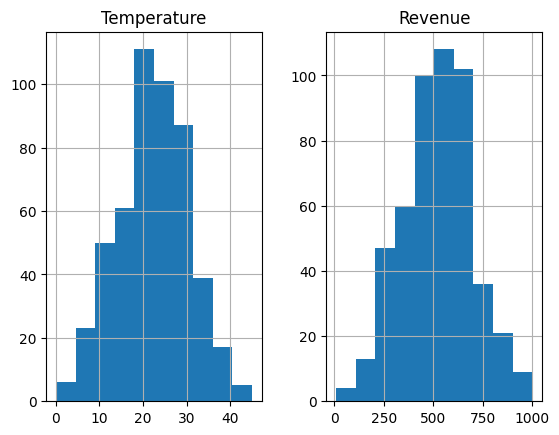

In [75]:
viz = df[["Temperature","Revenue"]]
viz.hist()
plt.show()

##### Since we only have two variables to compare, we can only observe that both histograms have similar distributions and possibly share a relationship.

##### Now we are going to display some scatter plots of these features to se how linear their relationship is.

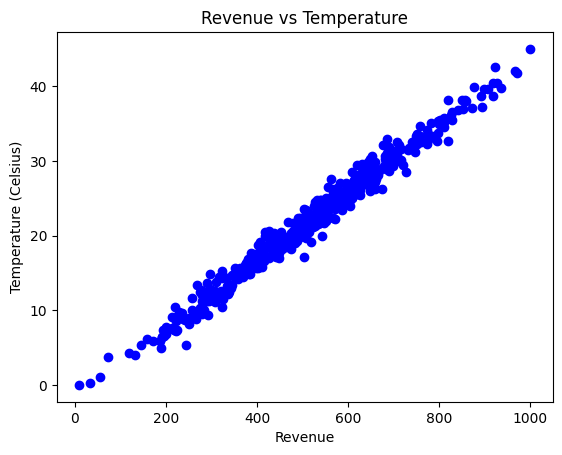

In [76]:
X = df["Revenue"]
y = df["Temperature"]
plt.scatter(X,y, color="blue")
plt.title("Revenue vs Temperature")
plt.xlabel("Revenue")
plt.ylabel("Temperature (Celsius)")
plt.show()

##### This shows us a strong linear relationship between Temperature and IceCream Revenue.

## Start the process to build a simple linear regression model

* Extract the input feature and labels from the dataset
* Define a function to display evaluation metrics
* Create train and test datasets
* Fit the simple linear model and make predictions

In [77]:
X = X.to_numpy()
y = y.to_numpy()

In [78]:
def regression_results(y_true, y_pred, regr_type):

    #Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_squared_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Evaluation metrics for {regr_type} :")
    print(f"Explained Variance: {round(ev,3)}")
    print(f"Mean Absolute Error: {round(mae,3)}")
    print(f"Mean Absolute Percentage Error: {round(mape,3)}")
    print(f"Mean Squared Error: {round(mse,3)}")
    print(f"R2 Score: {round(r2,3)}")
    print(f"RMSE: {round(np.sqrt(mse),3)}")
    print()

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
# Fit of simple linear regression model
lin_regr = LinearRegression()
lin_regr.fit(X_train.reshape(-1,1), y_train)
y_pred_linear = lin_regr.predict(X_test.reshape(-1,1))
print("Coefficients: \n", lin_regr.coef_)
print("Intercept: \n", lin_regr.intercept_)

Coefficients: 
 [0.04573302]
Intercept: 
 -1.6129456501482586


In [81]:
# Regression Results
regression_results(y_test, y_pred_linear, "Linear Regression")


Evaluation metrics for Linear Regression :
Explained Variance: 0.98
Mean Absolute Error: 0.865
Mean Absolute Percentage Error: 1.255
Mean Squared Error: 1.255
R2 Score: 0.98
RMSE: 1.12



## Plot the data and the predictions for comparison
##### Let's see how well the predictions match the data

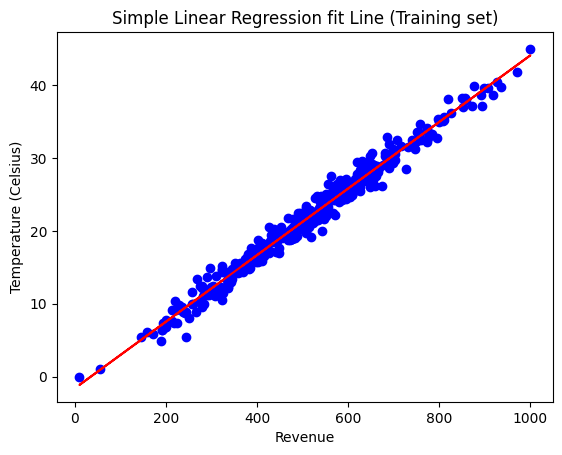

In [90]:
plt.scatter(X_train,y_train, color="blue")
plt.plot(X_train, lin_regr.coef_ * X_train + lin_regr.intercept_, color="red")
plt.title("Simple Linear Regression fit Line (Training set)")
plt.xlabel("Revenue")
plt.ylabel("Temperature (Celsius)")
plt.show()

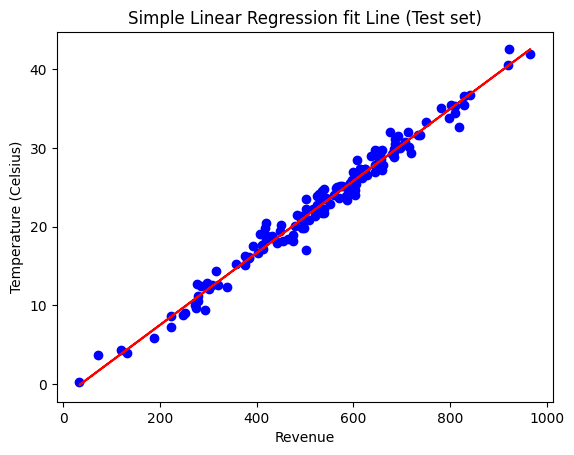

In [70]:
plt.scatter(X_test,y_test, color="blue")
plt.plot(X_test, lin_regr.coef_ * X_test + lin_regr.intercept_, color="red")
plt.title("Simple Linear Regression fit Line (Test set)")
plt.xlabel("Revenue")
plt.ylabel("Temperature (Celsius)")
plt.show()

## Model Interpretation

##### Linear Equation for the prediction: y = 0.046 * X - 1.61 ,  Therefore
##### X[Revenue] = 21.74 * y[Temperature] + 35

### Interpretation

#### For each unit increase in temperature, the expected revenue rises by approximately 21.74 units. When the temperature is zero, the predicted revenue is 35 units.

## Lets build a Revenue prediction code in base on our model interpretation

In [92]:
Temperature = float(input("Enter the temperature in Celsius:"))
Revenue = (21.74*Temperature) + 35
print(f"Ice-Cream Sales Revenue when the Temperature is {Tempperature} Celsius = {round(Revenue,2)} ")

Ice-Cream Sales Revenue when the Temperature is 35.0 Celsius = 904.6 
